<a href="https://colab.research.google.com/github/blackcrowX/Data_Analytics_Portfolio/blob/main/Project_III/Pokemon_Gen_1-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
<h1>Pokemon Generation 1-8</h1>
<img width="273px" src="https://raw.githubusercontent.com/blackcrowX/blackcrowX.github.io/main/images/icons/python.png"/>
</div>


This project embarks on a quest to unlock the secrets of Pokemon across Generation 1 to 8, harnessing the power of Python and embracing the processes of data loading, data cleaning, data analysis and data visualisation. With the aim of delving into a vast and comprehensive dataset comprising 1072 Pokemon and their alternate forms, we embark on an immersive journey to explore their unique attributes, unravel hidden patterns, and identify intriguing trends. By harnessing the capabilities of Python and leveraging a variety of libraries, we will deftly manipulate the data, create captivating visualizations, and conduct insightful statistical analyses, unearthing valuable insights about the enchanting Pokemon universe.


## Table of Contents
* Objective
* Dataset
* Setup
  * Import Libraries
  * Import Dataset
* Data Cleaning
  * Review Dataframe
  * Review Info
  * Review Missing Values
  * Rename Columns
  * Review Columns
* Data Analysis
  * Primary and Secondary Type Frequency
  * Strongest and Weakest Pokemon
  * Strongest Non-Legendary Pokemon
  * Generational Distribution
  * Strongest Generation
  * Distribution of Single Type Pokemon
  * Strongest Type by Median of Total
  * Distribution of Dual Type Pokemon
  * Strongest Dual Type by Median of Total
  * Total Stat and Type Ratio
  * Columns Correlation
*  Conclusion

<h1 align="center">Objective</h1>

Our objective is to find the strongest pokemon, strongest type and explore the datatset for insights and correlations.

<h1 align="center">Dataset</h1>

This dataset encompasses an astounding collection of all 898 Pokemon species, including 1072 variations, as of the year 2021. Delving deep into the fascinating realm of these mythical creatures, this dataset reveals a treasure trove of information, offering a holistic view of each Pokemon's unique attributes, origins, and legendary status. The dataset was published by <a href="https://data.world/data-society/pokemon-with-stats">data.world</a>.

<h1 align="center">Setup</h1>

## Step 1: Import Libraries

In this initial step, we import and configure the necessary libraries for our data analysis in Jupyter Notebook. Libraries such as Pandas, NumPy, Matplotlib, and Seaborn are essential for data manipulation, numerical computations, and data visualisation. 

In [ ]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "darkgrid")
sns.set_context('notebook', font_scale=1.1)

## Step 2: Import Dataset
Load the dataset into Python using Pandas as `df` for further analysis and exploration.

In [ ]:
url = "https://raw.githubusercontent.com/blackcrowX/Data_Analytics_Portfolio/main/Project_III/pokemon_gen_1-8.csv"
df = pd.read_csv(url)

<h1 align="center">Data Cleaning</h1>

## Step 3: Review Dataframe

Observe the first and last five rows of the dataframe to gain a quick overview of the data.

In [ ]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [ ]:
df.tail()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True
1071,898,Shadow Rider Calyrex,Psychic,Ghost,680,100,85,80,165,100,150,8,True



After reviewing the dataframe, it is evident that there are missing values represented as `NaN`, and the entries have unique names instead of unique numerical values.

## Step 4: Review Info

Inspect the dataframe's information to analyze the data types of each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


The dataframe consists of 13 columns, with nine columns being of integer type, three columns of object type, and one column of boolean type. The number of rows in the dataframe matches the total number of Pokemon species, including alternate forms. The column types align appropriately with their respective values.

## Step 5: Review Missing Values

Examine the presence of `Null` or `NaN` values to prevent errors and potential biases in subsequent analysis.


In [ ]:
df.isnull().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

Given that not all Pokemon species have a secondary type, we will address the missing values in this column by replacing them with a designated placeholder.

In [ ]:
df["type2"].fillna(value="None", inplace=True)

After filling in the missing values and ensuring that there are no remaining gaps in the dataframe, we can proceed to examine the columns.

## Step 6: Rename Columns

To enhance clarity and readability, we will rename the columns `type1` to `primary_type` and `type2` to `secondary_type`.

In [ ]:
df.rename(columns = {"type1":"primary_type", "type2":"secondary_type"}, inplace = True)


Let's verify if the columns in the dataframe have been successfully renamed.

In [ ]:
df.columns

Index(['number', 'name', 'primary_type', 'secondary_type', 'total', 'hp',
       'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation',
       'legendary'],
      dtype='object')

The columns `type1` and `type2` have been successfully renamed.

## Step 7: Review Columns

Let's review the columns of the dataframe to identify any inconsistencies, outliers, or incorrect entries that may affect the accuracy of our analysis.

In [ ]:
print("Pokemon Names:", len(df["name"].unique()))
print("Pokedex Numbers:", len(df["number"].unique()))
print("Primary Types:", len(df["primary_type"].unique()))
print("Secondary Types:", len(df["secondary_type"].unique()))
print("Generations:", len(df["generation"].unique()))

Pokemon Names: 1072
Pokedex Numbers: 898
Primary Types: 20
Secondary Types: 19
Generations: 9


In [ ]:
print("Total Stats:", min(df["total"].unique()), "-", max(df["total"]))
print("HP Stats:", min(df["hp"].unique()), "-", max(df["hp"]))
print("Attack Stats:", min(df["attack"].unique()), "-", max(df["attack"]))
print("Defense Stats:", min(df["defense"].unique()), "-", max(df["defense"]))
print("Special Attack Stats:", min(df["sp_attack"].unique()), "-", max(df["sp_attack"]))
print("Special Defense Stats:", min(df["sp_defense"].unique()), "-", max(df["sp_defense"]))
print("Speed Stats:", min(df["speed"].unique()), "-", max(df["speed"]))

Total Stats: 175 - 1125
HP Stats: 1 - 255
Attack Stats: 5 - 190
Defense Stats: 5 - 250
Special Attack Stats: 10 - 194
Special Defense Stats: 20 - 250
Speed Stats: 5 - 200


The unique lengths of the columns `name`, `number`, and `legendary` indicate that there are no duplicate values or unexpected variations. The statistics of the Pokemon also seem to fall within reasonable ranges. However, we need to investigate why there are more primary types than secondary types and why there are nine different values for eight generations of Pokemon. These inconsistencies suggest a potential issue with the data, which requires further exploration and understanding to ensure the accuracy and integrity of our analysis.

In [ ]:
print("Primary Type:",df["primary_type"].unique())
print("Secondary Type:",df["secondary_type"].unique())
print("Generations:",df["generation"].unique())

Primary Type: ['Grass' 'Fire' 'Water' 'Blastoise' 'Bug' 'Normal' 'Dark' 'Poison'
 'Electric' 'Ground' 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock'
 'Ghost' 'Dragon' 'Flying' 'Graass']
Secondary Type: ['Poison' 'None' 'Flying' 'Dragon' 'Water' 'Normal' 'Psychic' 'Steel'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Electric' 'Ice' 'Dark' 'Ghost'
 'Rock' 'Fire' 'Bug']
Generations: [1 7 8 2 3 4 5 6 0]


Now we have identified two incorrect values for the `primary_type` column, namely `Blastoise` and `Graass`, as well as one incorrect value for the `generation` column, which is `0`. To ensure data consistency and accuracy, we need to replace these incorrect values with the correct ones.

For the incorrect value `0` in the `generation` column:

In [ ]:
df.loc[df["generation"] == 0]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
950,808,Meltan,Steel,None,300,46,65,65,55,35,34,0,True
951,809,Melmetal,Steel,None,600,135,143,143,80,65,34,0,True
952,809,Gigantamax Melmetal,Steel,None,600,135,143,143,80,65,34,0,True


The incorrect value `0` in the `generation` column is likely a data error due to the release type of these Pokemon. They were distributed via Pokemon GO exclusively. Let's replace it with the generation it was introduced in to ensure the data accurately represents the Pokemon's generation.

In [ ]:
df.generation = df.generation.replace(0, 7)

For the incorrect value `Graass` in the `primary_type` column:

In [ ]:
df.loc[df["primary_type"] == "Graass"]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
978,830,Eldegoss,Graass,None,460,60,50,90,80,120,60,8,False


The incorrect value `Graass` in the `primary_type` column seems to be a misspelling or typo. We need to replace the incorrect value with the correct primary type to maintain data integrity and consistency.

In [ ]:
df.primary_type = df.primary_type.str.replace("Graass", "Grass")

For the incorrect value `Blastoise` in the `primary_type` column:

In [ ]:
df.loc[df["primary_type"] == "Blastoise"]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
15,9,Gigantamax Blasoise,Blastoise,Water,530,79,83,100,85,105,78,1,False


The incorrect value `Blastoise` in the `primary_type` column appears to be a typographical error. We need to determine the correct primary type for the Pokemon and replace the incorrect value with the accurate one to ensure data accuracy and reliability.

In [ ]:
df.loc[15,["primary_type","secondary_type"]] = ["Water", "None"]

Let's verify if the changes have been successfully applied and updated in the dataframe. This will allow us to ensure that the incorrect values have been replaced with the correct values and the dataframe reflects the accurate information.

In [ ]:
print("Pokemon Names:", len(df["name"].unique()))
print("Pokedex Numbers:", len(df["number"].unique()))
print("Primary Types:", len(df["primary_type"].unique()))
print("Secondary Types:", len(df["secondary_type"].unique()))
print("Generations:", len(df["generation"].unique()))
print("Legendary:", len(df["legendary"].unique()))

Pokemon Names: 1072
Pokedex Numbers: 898
Primary Types: 18
Secondary Types: 19
Generations: 8
Legendary: 2


Now that we have successfully cleaned the dataframe, we can proceed with data analysis and data visualization. With the erroneous values corrected and the dataframe in a clean state, we can confidently explore and derive insights from the data.

<h1 align="center">Data Analysis</h1>

## Step 8: Primary and Secondary Type Frequency

Now that we have reviewed the unique types present in the dataset, let's analyze the frequency of each primary and secondary type among the Pokemon. This analysis will provide us with valuable information on how many Pokemon belong to each type, allowing us to gain insights into the distribution and prevalence of different types within the dataset.

In [ ]:
print(df["primary_type"].value_counts())


Water       137
Normal      117
Grass        95
Bug          83
Psychic      80
Fire         67
Electric     63
Rock         60
Dark         48
Fighting     45
Ghost        43
Poison       42
Ground       42
Dragon       41
Steel        39
Ice          38
Fairy        23
Flying        9
Name: primary_type, dtype: int64


In [ ]:
print(df["secondary_type"].value_counts())

None        499
Flying      114
Fairy        44
Psychic      43
Poison       41
Ground       39
Steel        36
Dragon       35
Fighting     32
Grass        29
Dark         28
Ghost        26
Water        21
Ice          19
Fire         18
Rock         16
Normal       11
Electric     11
Bug          10
Name: secondary_type, dtype: int64


We can conclude that among the Pokemon in the dataset, the primary type with the highest frequency is `Water`, while the secondary type with the highest frequency is `None`, indicating that a significant number of Pokemon do not have a secondary type. Conversely, the primary type with the lowest frequency is `Flying`, and the secondary type with the lowest frequency is `Bug`. Additionally, it is worth noting that nearly half of all Pokemon only have a primary type, and approximately 1/10 of all Pokemon have the Flying type as their secondary type. These findings provide valuable insights into the distribution and composition of Pokemon types within the dataset.

## Step 9: Strongest and Weakest Pokemon

Now, let's determine the strongest and weakest Pokemon based on their overall statistics.

In [ ]:
strongest = df.sort_values(by="total", ascending=False)
strongest.head(10)

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1057,890,Eternamax Eternatus,Poison,Dragon,1125,255,115,250,125,250,130,8,True
204,150,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
471,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
205,150,Mega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,True
467,382,Primal Kyogre,Water,None,770,100,150,90,180,160,90,3,True
469,383,Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
942,800,Ultra Necrozma,Psychic,Dragon,754,97,167,97,167,97,129,7,True
597,493,Arceus,Normal,None,720,120,120,120,120,120,120,4,True
1053,888,Zacian Crowned Sword Forme,Fairy,Steel,720,92,170,115,80,115,148,8,True
1055,889,Zamazenta Crowned Sheild Forme,Fighting,Steel,720,92,130,145,80,145,128,8,True


In [ ]:
weakest = df.sort_values(by="total")
weakest.head(10)

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
883,746,Wishiwashi Solo Forme,Water,None,175,45,20,20,25,25,40,7,False
247,191,Sunkern,Grass,None,180,30,30,30,30,30,30,2,False
971,824,Blipbug,Bug,None,180,25,20,20,25,45,45,8,False
1031,872,Snom,Ice,Bug,185,30,25,35,45,30,20,8,False
367,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
491,401,Kricketot,Bug,None,194,37,25,41,25,41,25,4,False
333,265,Wurmple,Bug,None,195,45,45,35,20,30,20,3,False
20,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
16,10,Caterpie,Bug,None,195,45,30,35,20,20,45,1,False
348,280,Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False


So now we have determined that the strongest Pokemon in the game is `Eternamax Eternatus`, followed by `Mega Mewtwo X`, `Mega Rayquaza`, and `Mega Mewtwo Y`. On the other hand, the weakest Pokemon is `Wishiwashi Solo Forme`, followed by `Sunkern` and `Blipbug`. It is noteworthy that all the strongest Pokemon are legendary, while all the weakest Pokemon are non-legendary.

## Step 10: Strongest Non-Legendary Pokemon

In this step, we aim to identify the strongest single-typed non-legendary Pokemon. By filtering out legendary Pokemon, we can focus on determining the highest-performing non-legendary Pokemon within each type.

In [ ]:
strongest_noleg = strongest[~strongest["legendary"]].sort_values(by="total", ascending=False)
strongest_noleg.head(10)

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
458,376,Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
454,373,Mega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
311,248,Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
539,445,Mega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
358,289,Slaking,Normal,None,670,150,160,100,95,65,100,3,False
778,658,Ash-Greninja,Water,Dark,640,72,145,67,153,71,132,6,False
176,130,Mega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
326,260,Mega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False
8,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
9,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


After analyzing the data, we have discovered that the strongest non-legendary Pokemon is `Mega Metagross`, followed by `Mega Salamance` and `Mega Tyranitar`. It's interesting to note that `Slaking` is the only Pokemon on the list without a prefix.

## Step 11: Generational Distribution

Now, let's explore the distribution of Pokemon across different generations utilizing the countplot() function and see how the number of Pokemon varies.


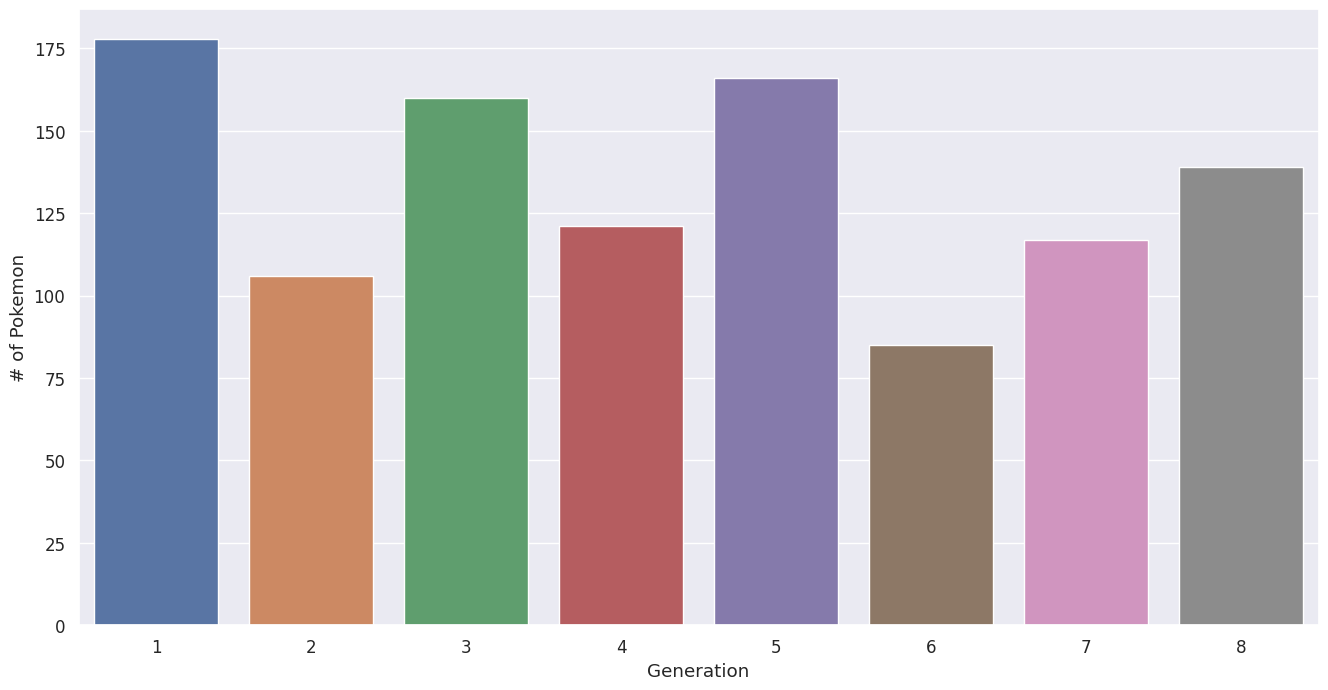

In [ ]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(
          x = df["generation"],
          data= df
          ).set(xlabel ="Generation", ylabel = "# of Pokemon")

The dataset reveals that the highest number of Pokemon belongs to the first generation, and there is no clear trend observed across generations. Interestingly, the even-numbered generations tend to introduce fewer Pokemon compared to the odd-numbered generations.

To visually analyze the distribution of Pokemon types across generations, we can utilize the catplot() function.

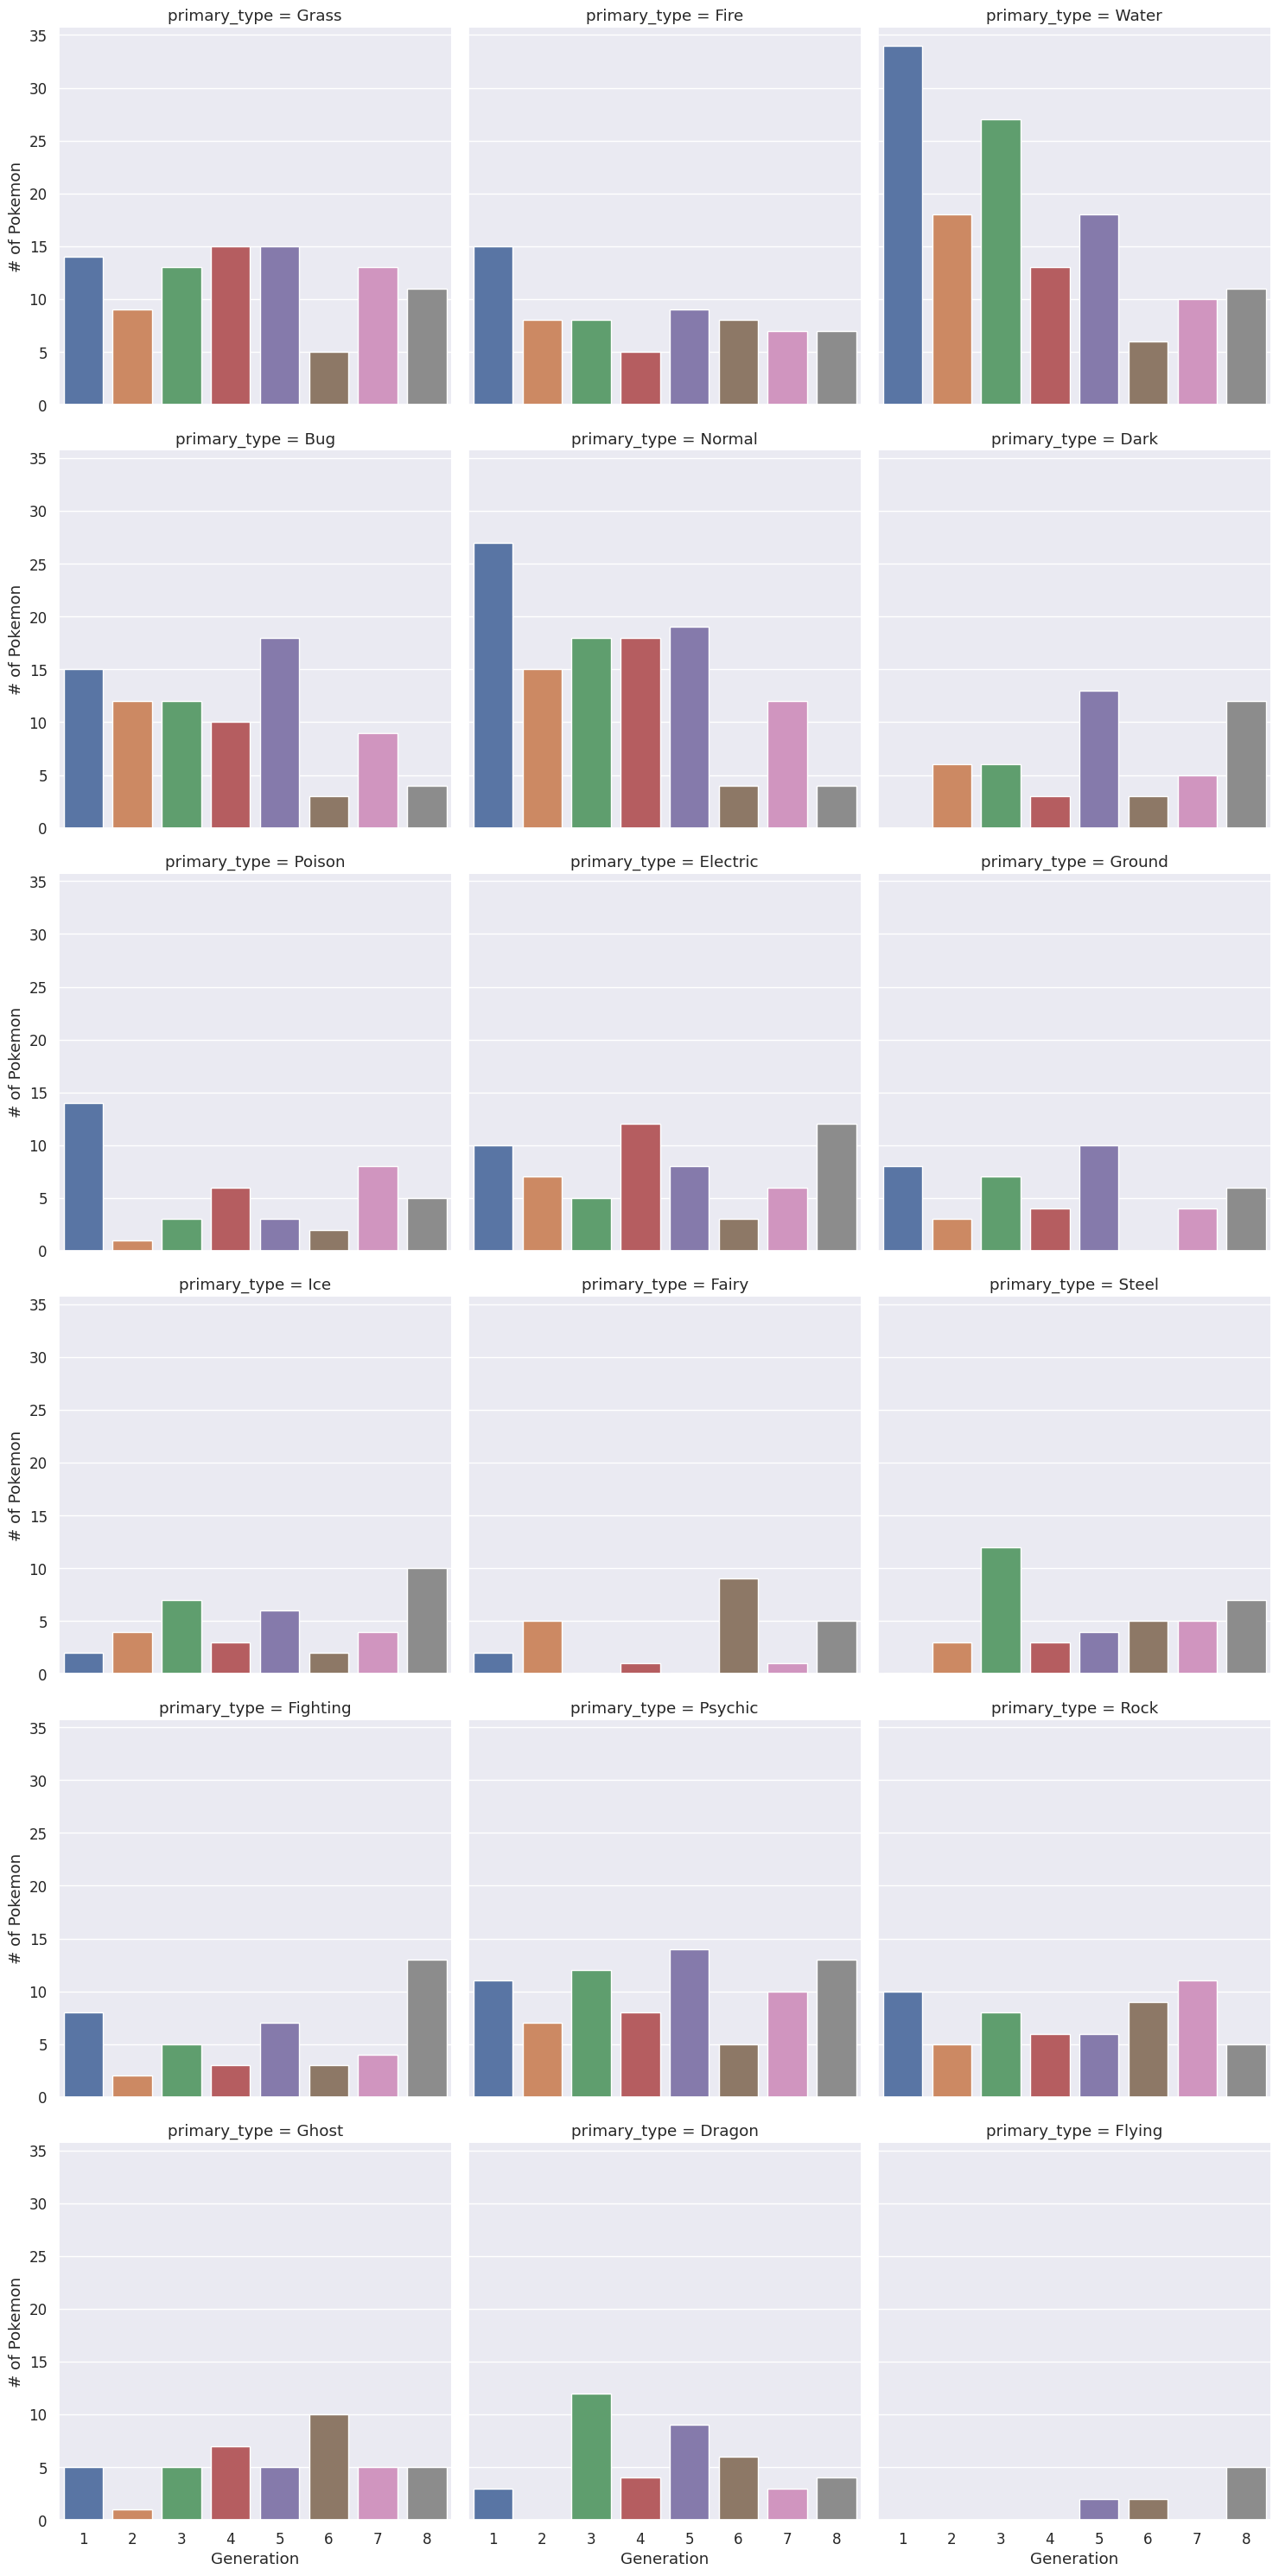

In [ ]:
sns.catplot(
    x='generation',
    data=df,
    col='primary_type',
    kind='count',
    col_wrap=3
).set_axis_labels('Generation', '# of Pokemon');

We can observe that Pokemon with the primary type of `Flying` were introduced more recently, starting from the fifth generation. Additionally, it's interesting to note that there are no Pokemon with the `Dark` or `Steel` type in the first generation of Pokemon.

## Step 12: Strongest Generation

To determine the strongest generation, let's analyze the total statistics of Pokemon across different generations utilizing the swarmplot() function.

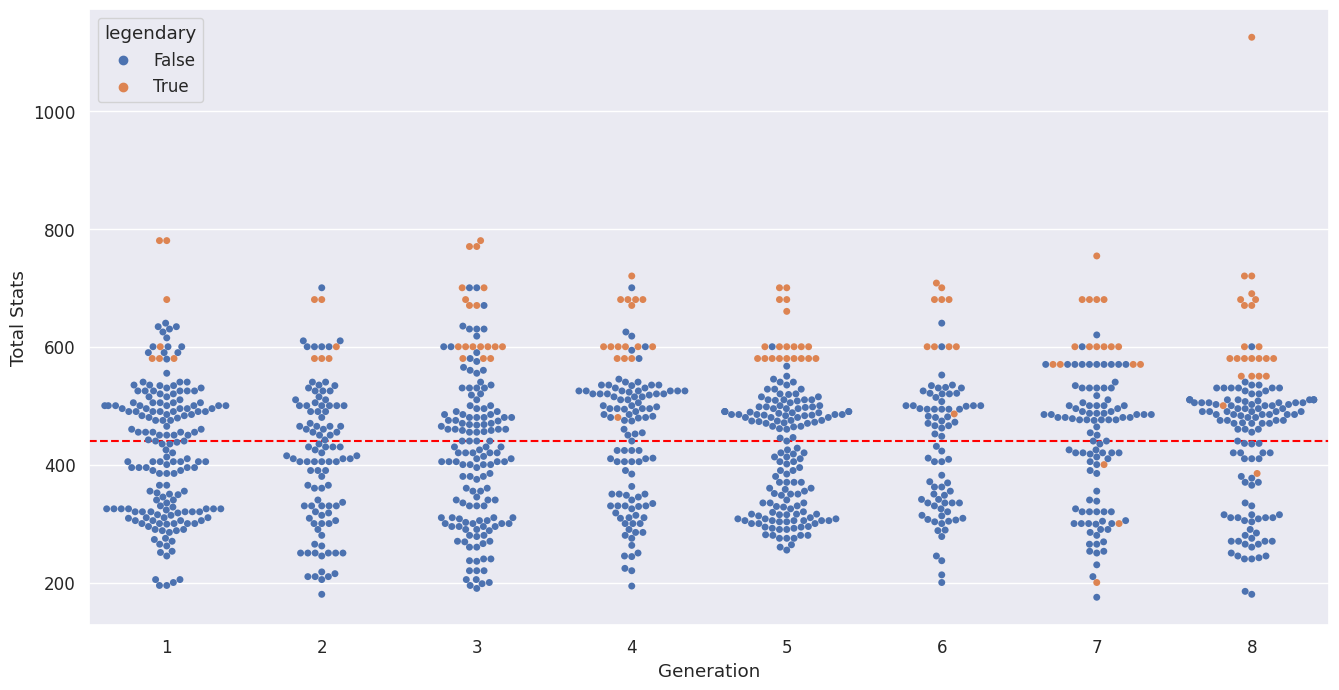

In [ ]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.swarmplot(
        data = df, 
        x = "generation",
        y= "total",
        hue = "legendary"
        ).set(xlabel ="Generation", ylabel = "Total Stats")
plt.axhline(df["total"].mean(), color = "red", linestyle = "dashed");

Let's analyze the total statistics of Pokemon across different generations utilizing the regplot() function.

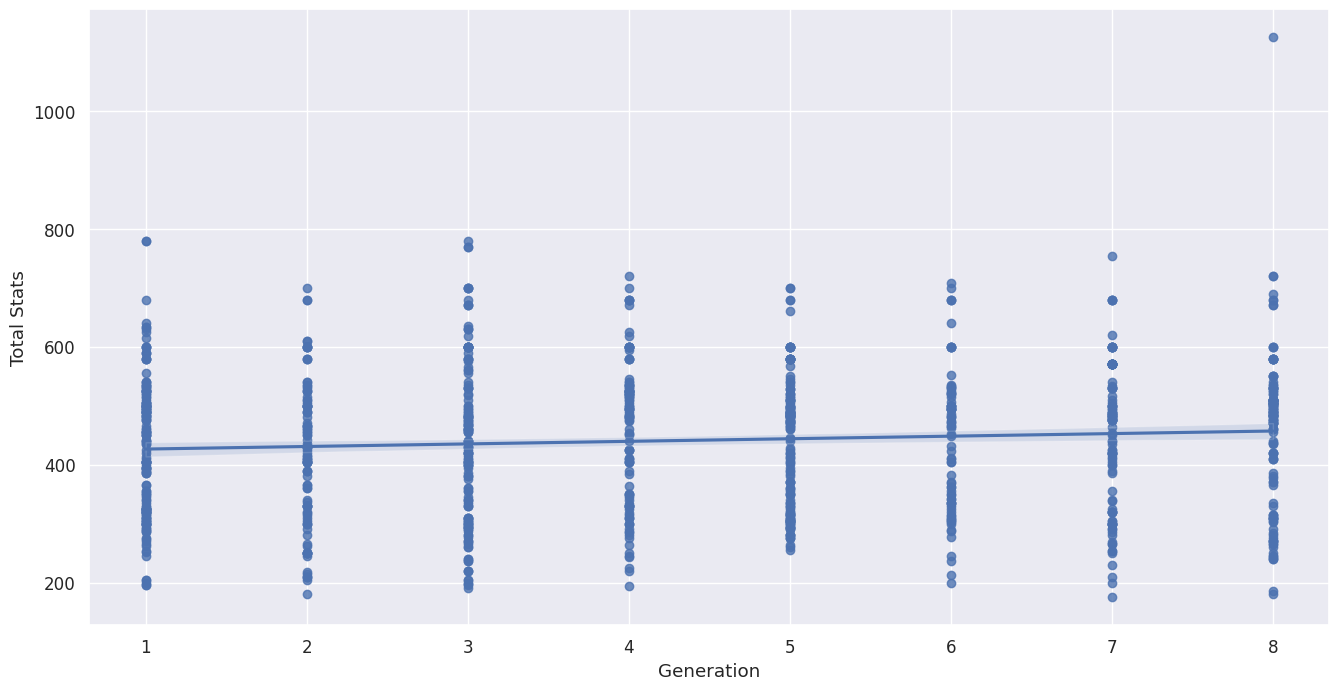

In [ ]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.regplot(
        data = df, 
        x = "generation",
        y= "total",
        ).set(xlabel ="Generation", ylabel = "Total Stats")

The analysis suggests that the newest generation tends to have slightly higher total statistics on average. It is worth noting that the majority of the strongest Pokemon are legendary, with a few exceptions in generations 7 and 8. These exceptions include legendary Pokemon that fall below the mean total statistics of all Pokemon.

## Step 13: Distribution of Single Type Pokemon

Now, let's examine the distribution of Pokemon with a single type using the countplot() function.

In [ ]:
single_types = df[df["secondary_type"] == "None"]

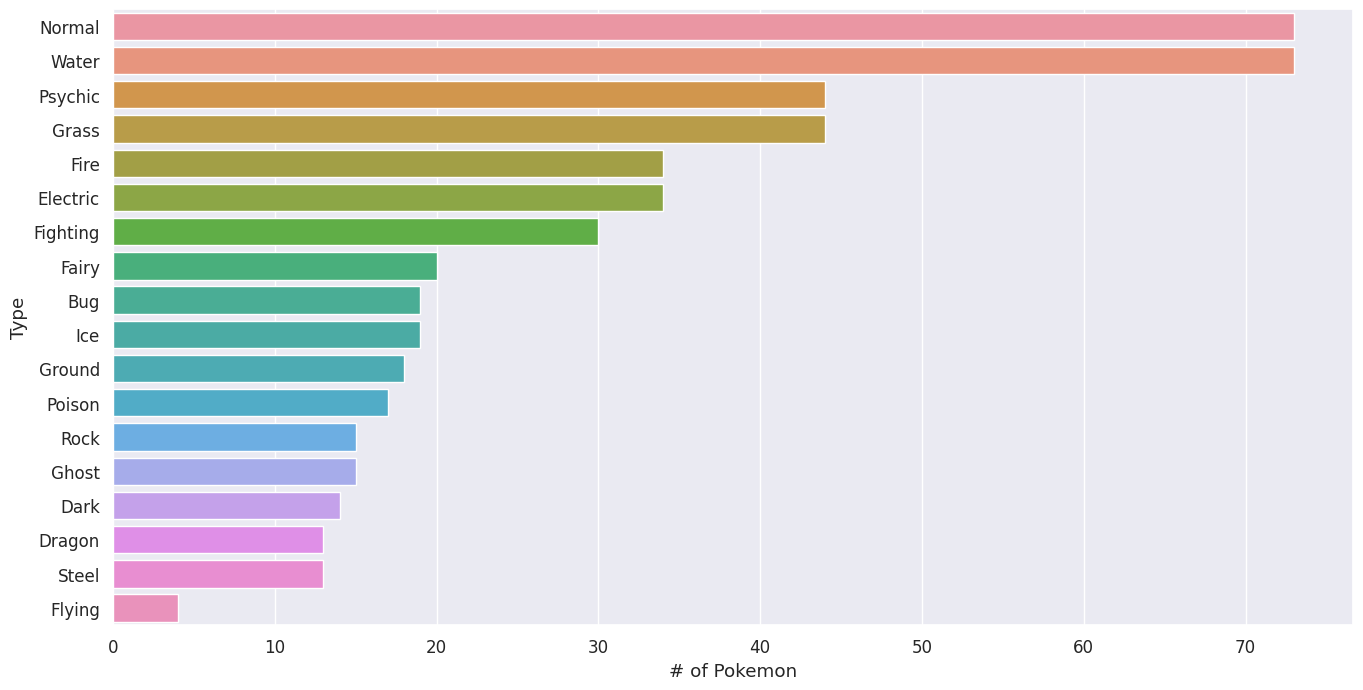

In [ ]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.countplot(
        y="primary_type", 
        data=single_types,
        order=single_types["primary_type"].value_counts().index,
        ).set(xlabel ="# of Pokemon", ylabel = "Type");

This plot illustrates the distribution of single-typed Pokemon. It reveals that the most prevalent single-typed Pokemon are of type `Water` and `Normal`, with an equal number in each category. They are closely followed by Pokemon of type `Psychic` and `Grass`, also in equal numbers. On the other hand, the least common single-typed Pokemon belong to the `Flying` type.

## Step 14: Strongest Type by Median of Total

In this step, we aim to identify the strongest types based on the median value of their total stats using the boxplot() function.

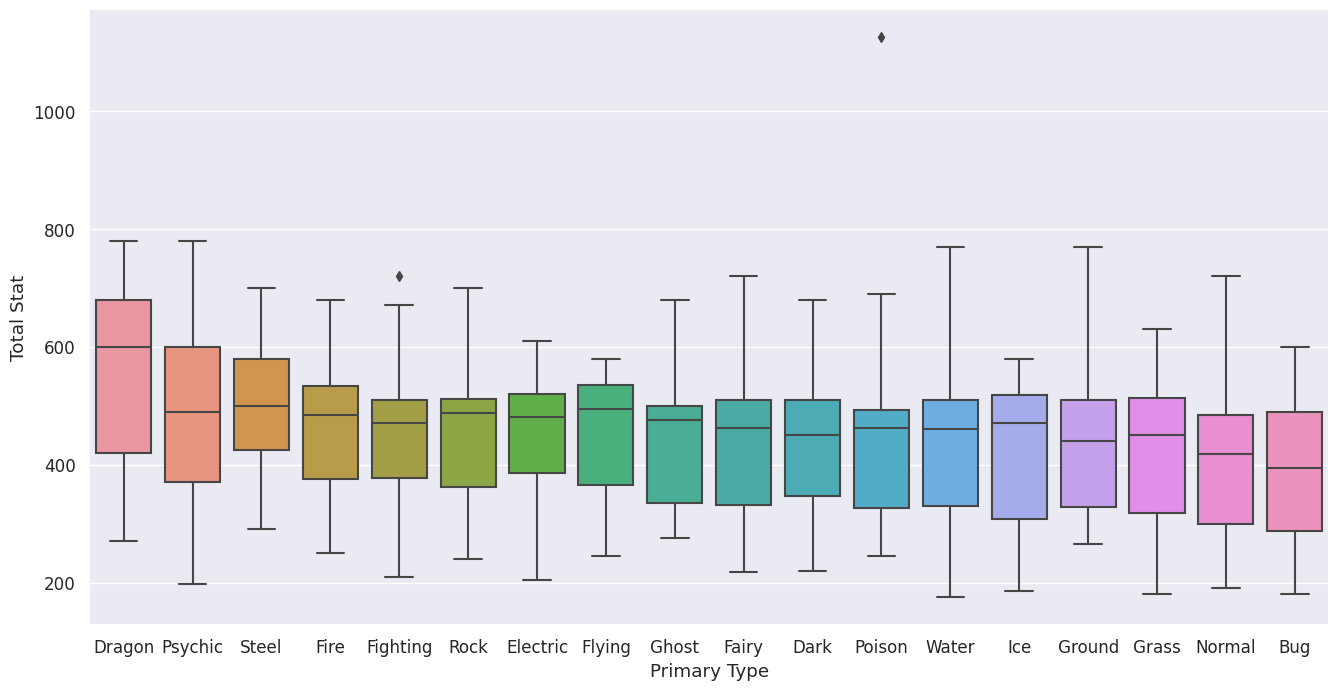

In [ ]:
group_means = df.groupby(['primary_type'])['total'].mean().sort_values(ascending=False)

f, ax = plt.subplots(figsize = (16,8))
ax = sns.boxplot(
            data = df,
            x = "primary_type", 
            y = "total",
            order = group_means.index
            ).set(xlabel ="Primary Type", ylabel = "Total Stat")

Let's plot the secondary type as well.


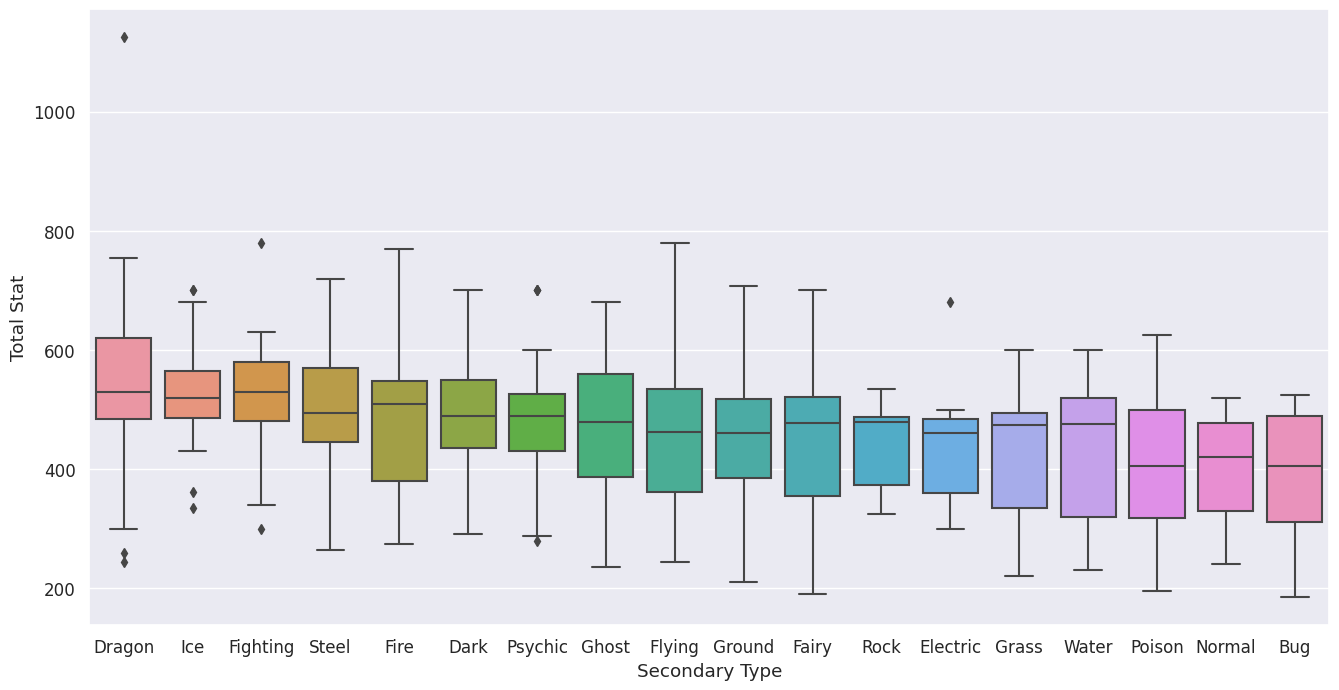

In [ ]:
group_means = df[df["secondary_type"] != "None"].groupby(['secondary_type'])['total'].mean().sort_values(ascending=False)

f, ax = plt.subplots(figsize = (16,8))
ax = sns.boxplot(
            data = df,
            x = "secondary_type", 
            y = "total",
            order = group_means.index
            ).set(xlabel ="Secondary Type", ylabel = "Total Stat")

We can observe that the primary typing with the highest median of total stat is `Dragon`, followed by `Steel`. Similarly, the secondary typing with the highest total stat is `Dragon`, closely followed by `Fighting`. On the other hand, Pokemon of the `Bug` type exhibit the lowest median of total stat.


## Step 15: Distribution of Dual Type Pokemon

In this step, we will visualize the distribution of dual type Pokemon by plotting a chart that shows the various combinations of primary and secondary types. This will provide insights into the prevalence of different type combinations within the Pokemon universe.

In [ ]:
dual_types = df[df["secondary_type"] != "None"]

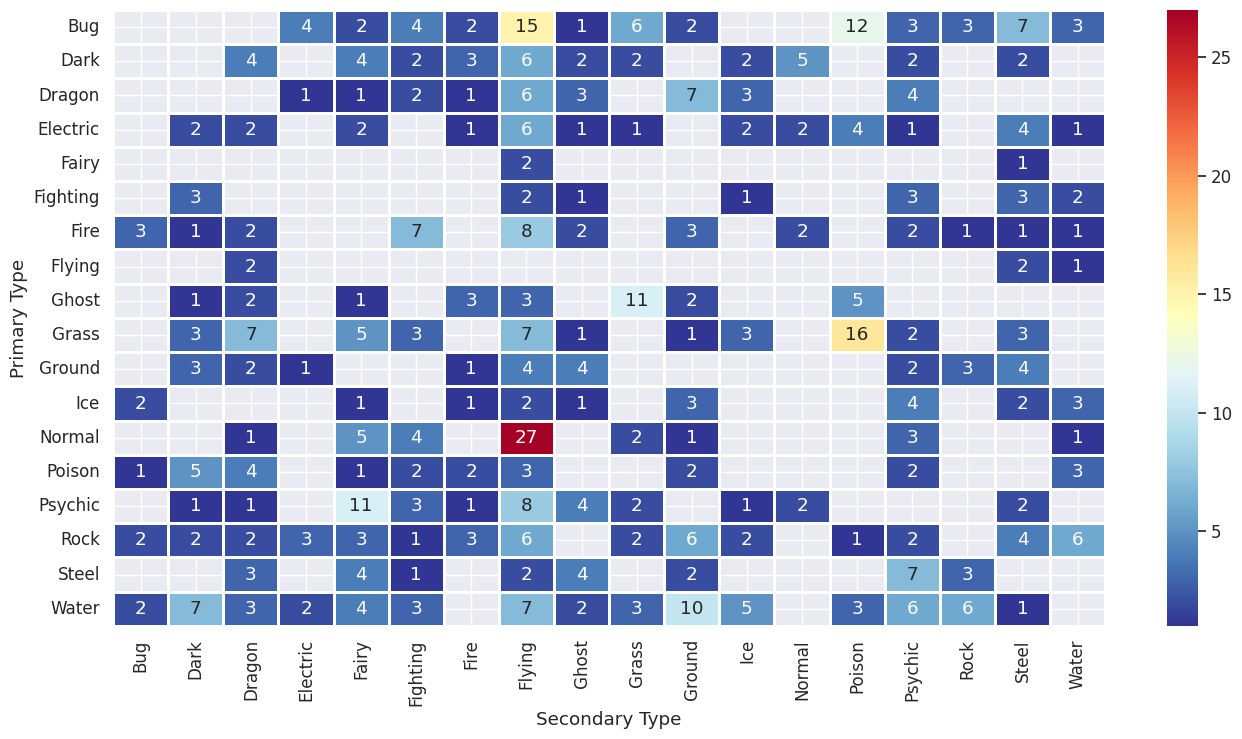

In [ ]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.heatmap(
          dual_types.groupby(["primary_type", "secondary_type"]).size().unstack(),
          linewidths = 1,
          annot = True,
          cmap = "RdYlBu_r"
          ).set(xlabel ="Secondary Type", ylabel = "Primary Type")

Upon analyzing the chart, we can observe that the top three most common combinations of primary and secondary types among Pokemon are as follows:

1. `Normal`/`Flying`-type
2. `Bug`/`Flying`-type
3. `Grass`/`Poison`-type

These combinations appear with the highest frequency, indicating their prevalence among the dual type Pokemon in the dataset.

## Step 16: Strongest Dual Type by Median of Total

In this step, we aim to identify the strongest dual type combination based on the median value of their total stats. By calculating the median of the total stats for each dual type combination, we can determine the combination with the highest overall strength.

In [ ]:
medians = df.groupby(["primary_type", "secondary_type"]).median(numeric_only=True).loc[:, "total"]

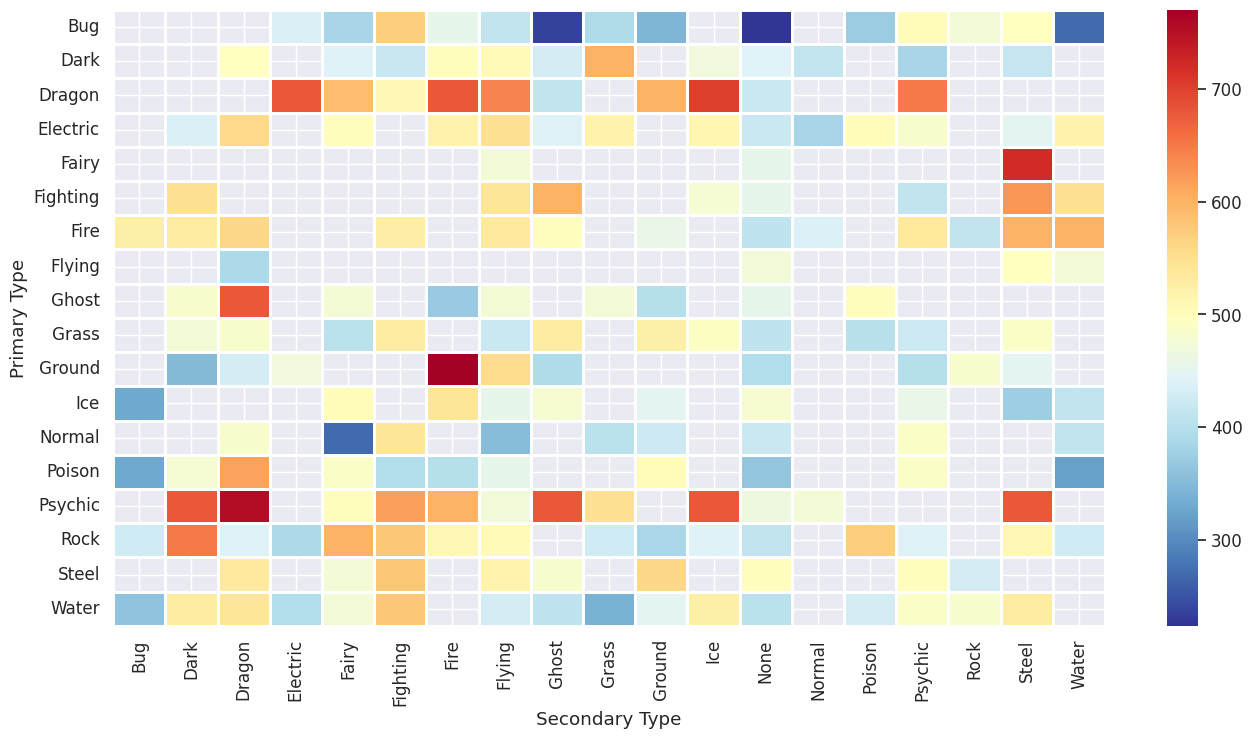

In [ ]:
f, ax = plt.subplots(figsize = (16,8))
ax = sns.heatmap(
      medians.unstack(),
      linewidths=1,
      cmap="RdYlBu_r"
      ).set(xlabel ="Secondary Type", ylabel = "Primary Type")

Based on the median of total stats, the strongest dual type combination is `Ground`/`Fire`, indicating that Pokemon with this combination tend to have high overall strength. Following closely is the dual type combination `Psychic`/`Dragon`.

Now, let's explore the specific Pokemon that fall under these typings to further understand their individual attributes and characteristics.

In [ ]:
df[(df["primary_type"] == 'Ground') & (df["secondary_type"] == 'Fire')]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
469,383,Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


In [ ]:
df[(df["primary_type"] == 'Psychic') & (df["secondary_type"] == 'Dragon')]

,number,name,primary_type,secondary_type,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
942,800,Ultra Necrozma,Psychic,Dragon,754,97,167,97,167,97,129,7,True


It is worth noting that there is only one Pokemon for each of the strongest dual type combinations identified, namely `Ground`/`Fire` and `Psychic`/`Dragon`. This limited representation explains why these specific combinations have a higher median compared to others with a larger sample size. It highlights one of the limitations of using heat maps, as they can obscure the actual number of Pokemon representing each individual combination.

## Step 17: Columns Correlation

Let's explore the correlation between each column in the dataframe to identify any potential relationships or dependencies.



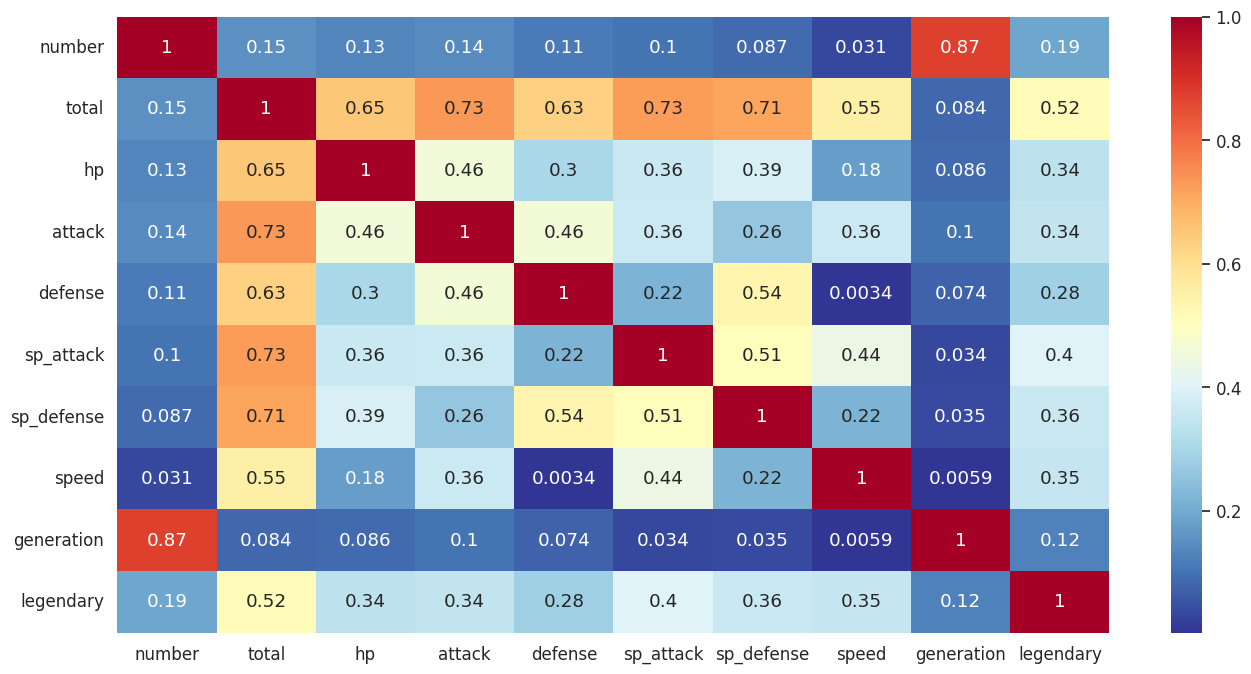

In [ ]:
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.heatmap(
      df.corr(numeric_only=True), 
      annot=True, 
      cmap="RdYlBu_r"
      )

Based on the correlation analysis, we observe a strong positive correlation between the `number` and `generation` columns, with a coefficient of 0.87. Additionally, the `attack` and `sp_attack` columns show a moderate positive correlation of 0.73 with the `total` column. Furthermore, the `sp_defense` column demonstrates a similar moderate positive correlation with a coefficient of 0.71.

# Conclusion

In conclusion, the data analysis of Pokemon has provided several interesting insights and findings. Here are the key takeaways:

1. Primary and Secondary Types: The most common primary type among Pokemon is `Water`, while the most common secondary type is `None`. `Flying` type is relatively rare as both a primary and secondary type.

2. Strength and Weakness: Legendary Pokemon tend to dominate the list of strongest Pokemon, while non-legendary Pokemon are generally weaker. `Eternamax Eternatus` emerges as the strongest Pokemon, while `Wishiwashi Solo Forme` is the weakest.

3. Generational Distribution: The first generation has the highest number of Pokemon, and subsequent generations introduce varying numbers of new Pokemon. The even-numbered generations generally introduce fewer Pokemon compared to the odd-numbered ones.

4. Type Distribution: `Water` and `Normal` are the most common single types, while `Normal`/`Flying` and `Bug`/`Flying` are the most common dual type combinations.

5. Strongest Type:  `Dragon` type is the strongest type by median of total stats. While the `Bug` type is the weakest type by median of total stats.

6. Strongest Dual Types: `Ground`/`Fire` and `Psychic`/`Dragon` are the strongest dual type combinations based on median total stats, but this is due to the typing being represented by one Pokemon in total.

7. Correlation: The number and generation columns show a strong positive correlation, indicating that Pokemon numbers increase with each new generation. Additionally, attack and special attack, as well as special defense, are moderately correlated with the total stats of Pokemon.

These insights provide a deeper understanding of the Pokemon universe, including the distribution of types, strength variations, generational trends, and correlations between different attributes. Further analysis and exploration can be conducted to gain more detailed insights and uncover additional patterns within the dataset.